<a href="https://colab.research.google.com/github/harini15456/Edunexa-Tasks/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

1.VADER(Valence Aware Dictionary and sEntiment Reasoner - It a bag of words approach

2.Roberta Pretrained Model

3.Huggingface Pipeline

# **Import the required libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')


In [8]:
#Read the csv file
df=pd.read_csv("/content/7817_1.csv")
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [9]:
df['reviews.text'].values[0]
print(df.shape)

(1226, 27)


In [10]:
df=df.head(500)
print(df.shape)

(500, 27)


#**Exploratory Data Analysis**

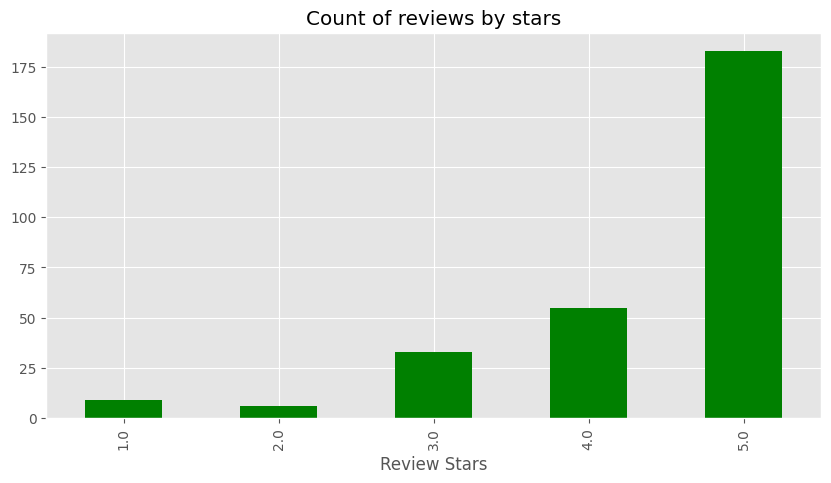

In [11]:
ax=df['reviews.rating'].value_counts().sort_index() \
      .plot(kind='bar',
            title='Count of reviews by stars',
            color='green',
            figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [12]:
example=df['reviews.text'][20]
print(example)

Almost like reading a real book. Don't is crisp, sharp and easy to read. I've held out from buying a reader for years because I could never quite get past the fact it wasn't a book. With this new kindle I don't even notice, I am immediately immersed. Wildly better than I expected.


In [13]:
nltk.download('punkt')
tokens=nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Almost', 'like', 'reading', 'a', 'real', 'book', '.', 'Do', "n't", 'is']

In [14]:
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Almost', 'RB'),
 ('like', 'IN'),
 ('reading', 'VBG'),
 ('a', 'DT'),
 ('real', 'JJ'),
 ('book', 'NN'),
 ('.', '.'),
 ('Do', 'VBP'),
 ("n't", 'RB'),
 ('is', 'VBZ')]

In [15]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  Almost/RB
  like/IN
  reading/VBG
  a/DT
  real/JJ
  book/NN
  ./.
  Do/VBP
  n't/RB
  is/VBZ
  crisp/JJ
  ,/,
  sharp/JJ
  and/CC
  easy/JJ
  to/TO
  read/VB
  ./.
  I/PRP
  've/VBP
  held/VBN
  out/RP
  from/IN
  buying/VBG
  a/DT
  reader/NN
  for/IN
  years/NNS
  because/IN
  I/PRP
  could/MD
  never/RB
  quite/RB
  get/VB
  past/IN
  the/DT
  fact/NN
  it/PRP
  was/VBD
  n't/RB
  a/DT
  book/NN
  ./.
  With/IN
  this/DT
  new/JJ
  kindle/NN
  I/PRP
  do/VBP
  n't/RB
  even/RB
  notice/JJ
  ,/,
  I/PRP
  am/VBP
  immediately/RB
  immersed/VBN
  ./.
  Wildly/RB
  better/JJR
  than/IN
  I/PRP
  expected/VBD
  ./.)


# **VADER Sentiment Scoring**
  We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.


*   This uses "bag of words" approach:


1.   Stop words are removed
2.   Each word is scores and combined to a totals cores





In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia= SentimentIntensityAnalyzer()
sia.polarity_scores("I never actually comment,but this is great.")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}

In [17]:
sia.polarity_scores("This is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [18]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.791}

In [19]:
#Run the polarity score

result={}
for i, row in tqdm(df.iterrows(),total=len(df)):
  text=row['reviews.text']
  myid=row['id']
  result[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
vaders=pd.DataFrame(result).T
vaders=vaders.reset_index().rename(columns={'index':'id'})
vaders=vaders.merge(df, how="left")

In [21]:
#We have sentiment score and metadata
vaders.head(5)

,id,neg,neu,pos,compound,asins,brand,categories,colors,dateAdded,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,0.0,0.773,0.227,0.8908,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


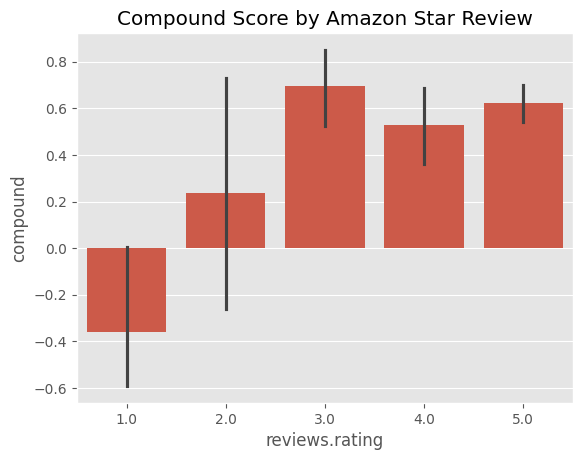

In [22]:
#Plot the vader results
ax = sns.barplot(data=vaders,x='reviews.rating',y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

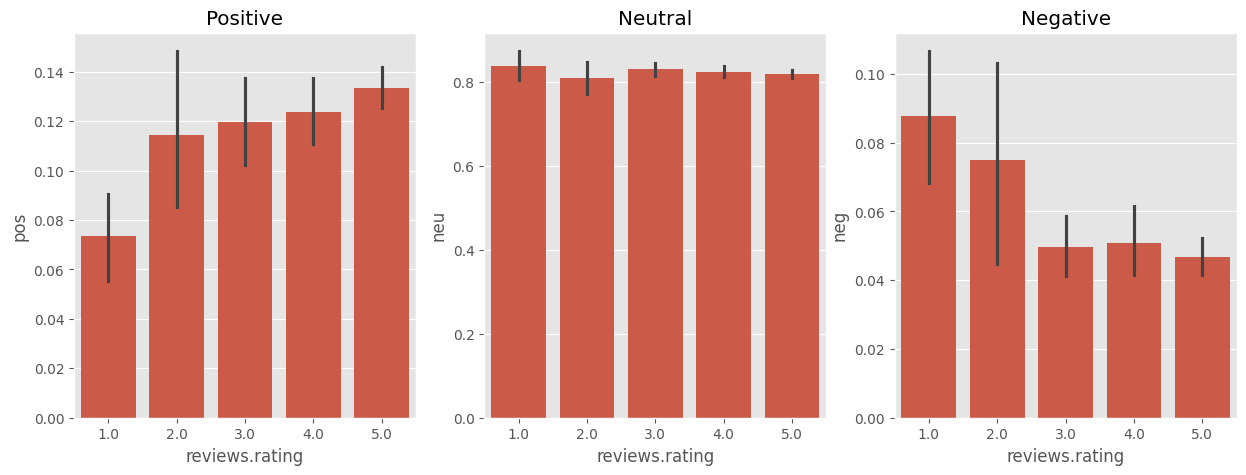

In [23]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='reviews.rating',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='reviews.rating',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='reviews.rating',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()


# **Roberts Pre-trained Model**



*   Use a model trained of a large corpus of data.
*   Transformer model accounts for the words but also the contents related to other words


*   For example, we may feedback which are sarcastic.This model identifies such words and give an overall compound score.






In [24]:
pip install transformers


In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [26]:
MODEL="cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [27]:
#Vader results on example
print(example)
sia.polarity_scores(example)

Almost like reading a real book. Don't is crisp, sharp and easy to read. I've held out from buying a reader for years because I could never quite get past the fact it wasn't a book. With this new kindle I don't even notice, I am immediately immersed. Wildly better than I expected.


{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.791}

In [28]:
#Run for roberta model

encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores = softmax(scores)
scores
#Scores printed are negative, neutral, positive

array([0.05624189, 0.12360617, 0.820152  ], dtype=float32)

In [29]:
scores_dict = {'roberta_neg':scores[0],
               'roberta_neu':scores[1],
               'roberta_pos':scores[2]}
print(scores_dict)


{'roberta_neg': 0.056241892, 'roberta_neu': 0.12360617, 'roberta_pos': 0.820152}


In [30]:
def polarity_scores_roberta(example):
  encoded_text=tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {'roberta_neg':scores[0],
               'roberta_neu':scores[1],
               'roberta_pos':scores[2]
                }
  return scores_dict


In [31]:
result={}
for i, row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['reviews.text']
    myid=row['id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_result=polarity_scores_roberta(text)
    both={**vader_result,**roberta_result}
    result[myid]=both
  except  RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id AVpe7AsMilAPnD_xQ78G
Broke for id AVpfBEWcilAPnD_xTGb7
Broke for id AVpfpK8KLJeJML43BCuD
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_
Broke for id AVpfLiCSilAPnD_xWpk_


In [33]:
result_df=pd.DataFrame(result).T
result_df=result_df.reset_index().rename(columns={'index':'id'})
result_df=result_df.merge(df, how="left")

# **Combine and compare**

In [35]:
#compare scores between models

result_df.columns

Index(['id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

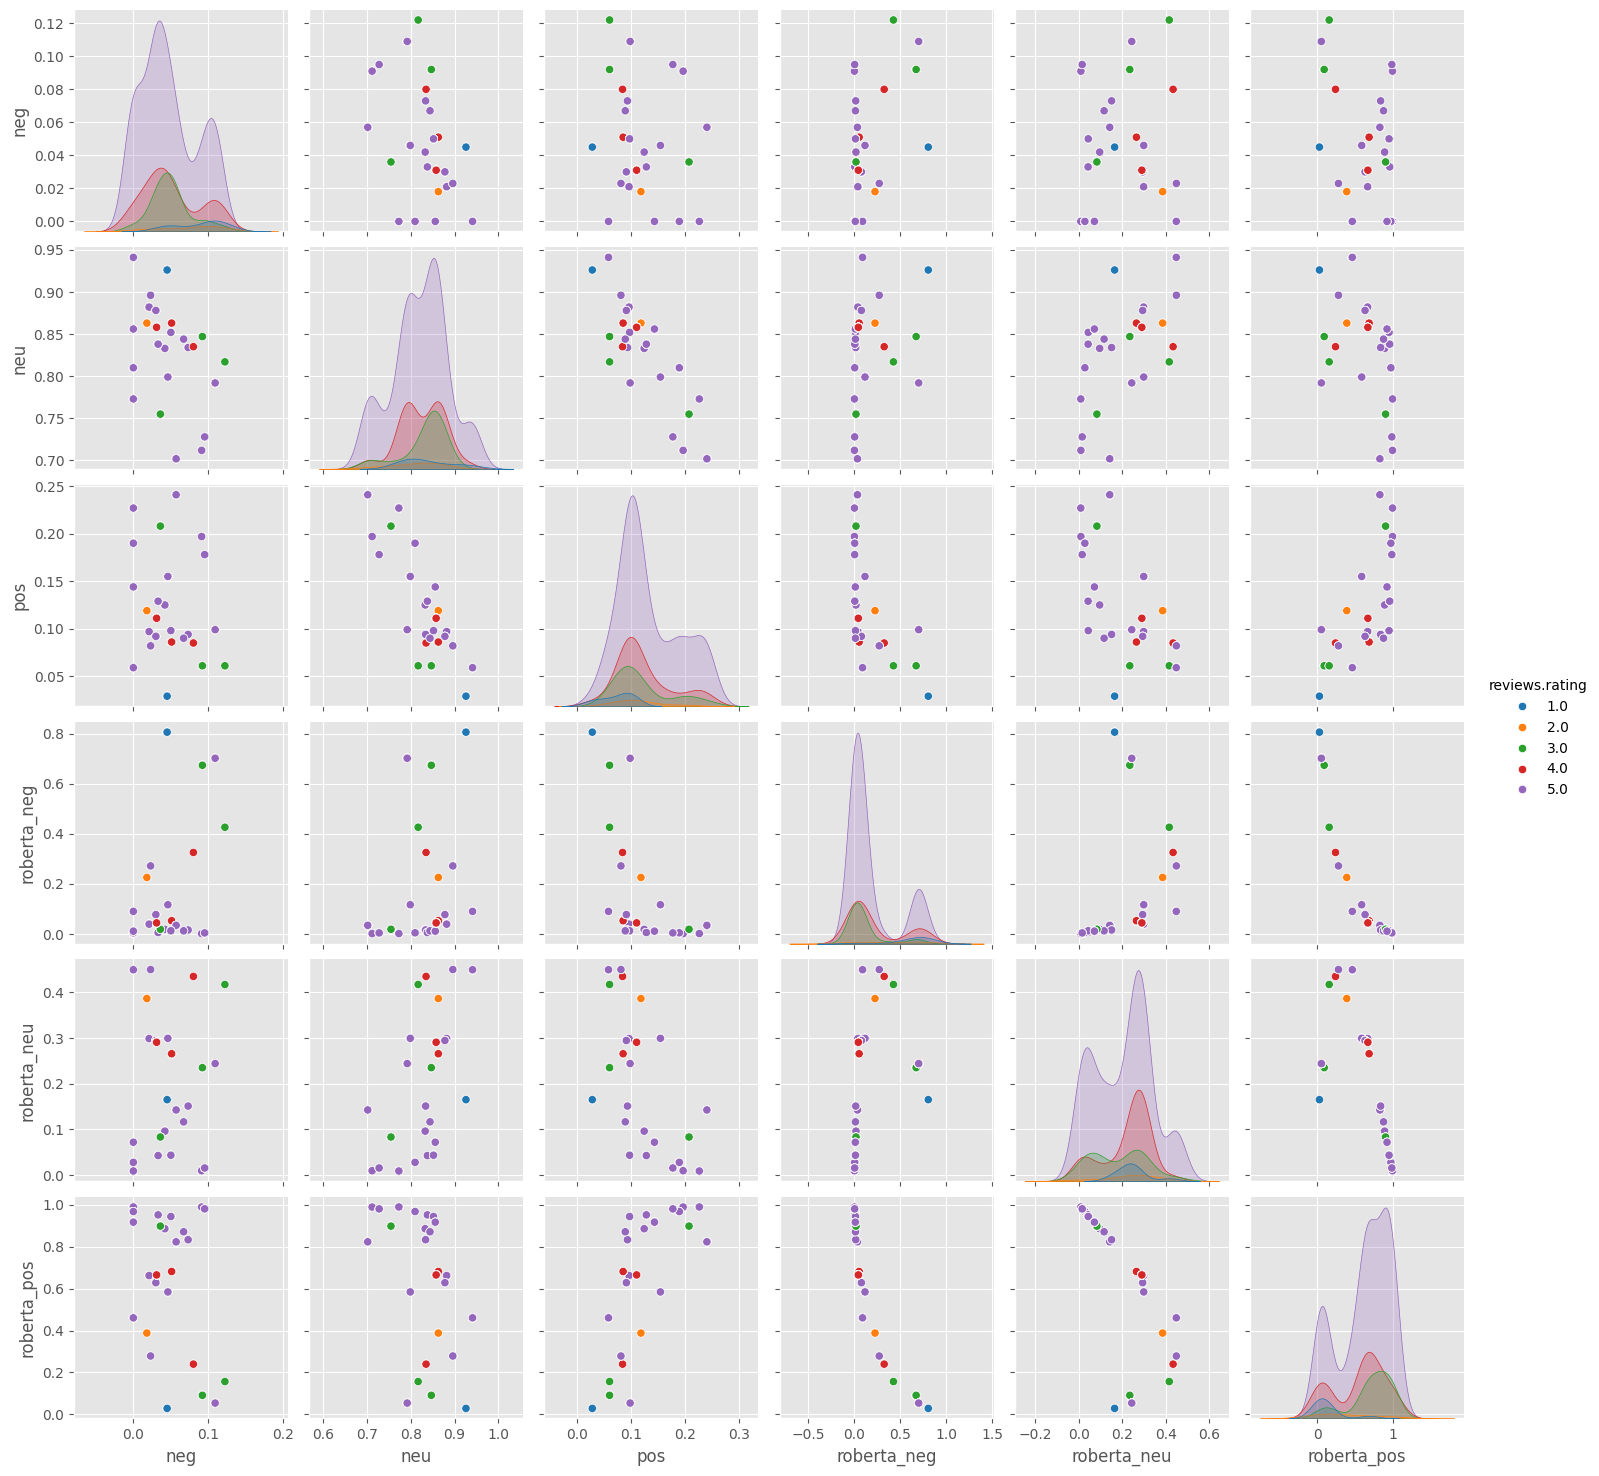

In [37]:
sns.pairplot(data=result_df,
             vars=['neg', 'neu', 'pos','roberta_neg', 'roberta_neu','roberta_pos'],
             hue='reviews.rating',
             palette='tab10')
plt.show()

# **Review Examples**


*   Positive- 1 Star and Negative - 5 Star Reviews
Here the model scoring and review score differ the most



In [49]:
#Review examples

result_df.query('`reviews.rating`==1') \
         .sort_values('roberta_pos',ascending=False)['reviews.text'].values[0]

'After 15 months, my 500+ tablet is no longer useable. It is stuck on the boot screen. I invested a lot of into Amazon movies and books. This stinks.'

In [51]:
result_df.query('`reviews.rating`==1') \
         .sort_values('pos',ascending=False)['reviews.text'].values[0]

"I like it but the most used app is Netflix. This Netflix app version is older and a pain to use. Why they have this outdated one, doesn't make any sense."

In [52]:
#negative sentiment

result_df.query('`reviews.rating`==5') \
         .sort_values('roberta_neg',ascending=False)['reviews.text'].values[0]

'Very useful for those who enjoy reading and inspiring those who do not have a habit of reading. Needed for anyone not yet'

In [53]:
result_df.query('`reviews.rating`==5') \
         .sort_values('neg',ascending=False)['reviews.text'].values[0]

"I am not a casual user of on-demand content and devices. Having tried smart tv's from 3 brands, smart dvd/bluray players, Apple TV, WDTV, HTPC, Chromecast and too many other competing products to mention--for streaming content, before this box you really had two options (for a simple to use box that doesn't require additional items or tweaking):First is Apple TV which is easy to use (interface) but Apple limits the content you can get greatly (including no Prime Streaming built in) and it lacks a lot in features as well and is slow. The reason for selecting Apple TV is if you have other apple products that unlock features (like Amazon's content).The second option you could consider was Roku--which really means a Roku 3 box since it is heads and tails better than past Roku boxes in terms of remote and speed. Now Roku stands out with the most content and the most features of any box with the Roku 3. It is for that reason you will see me address the Roku 3 so often in this review.I have 

# **Transformers Pipeline**

In [54]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [55]:
sent_pipeline("I love doing project on sentiment analysis")

[{'label': 'POSITIVE', 'score': 0.9994934797286987}]

In [56]:
sent_pipeline("I hate if compiler takes more time to compile")

[{'label': 'NEGATIVE', 'score': 0.9990399479866028}]